In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "data/bf3_data_2022_01_07.xlsx"

In [4]:
df = pd.read_excel(path)
print(df)

            DATE_TIME   CB_FLOW  CB_PRESS  CB_TEMP  STEAM_FLOW  STEAM_TEMP  \
0      01-07-21 00:10  311727.0      3.15    129.0         4.0       213.0   
1      01-07-21 00:20  315163.0      3.16    129.0         4.0       209.0   
2      01-07-21 00:30  314595.0      3.16    128.0         4.0       205.0   
3      01-07-21 00:40  312465.0      3.16    127.0         4.0       200.0   
4      01-07-21 00:50  302981.0      3.11    126.0         4.0       194.0   
...               ...       ...       ...      ...         ...         ...   
25400  31-12-21 23:10  278198.0      2.75     76.0         2.0       189.0   
25401  31-12-21 23:20  286486.0      2.80     77.0         1.0       190.0   
25402  31-12-21 23:30  284500.0      2.81     77.0         0.0       191.0   
25403  31-12-21 23:40  284455.0      2.83     77.0         1.0       190.0   
25404  31-12-21 23:50  274728.0      2.73     77.0         2.0       189.0   

       STEAM_PRESS  O2_PRESS  O2_FLOW  O2_PER  ...  TOP_TEMP2  

In [14]:
k = df.columns

In [8]:
# Removing missing values
df.dropna(inplace=True)

In [9]:
df.dtypes

DATE_TIME         object
CB_FLOW          float64
CB_PRESS         float64
CB_TEMP          float64
STEAM_FLOW       float64
STEAM_TEMP       float64
STEAM_PRESS      float64
O2_PRESS         float64
O2_FLOW          float64
O2_PER           float64
PCI              float64
ATM_HUMID        float64
HB_TEMP          float64
HB_PRESS         float64
TOP_PRESS        float64
TOP_TEMP1        float64
TOP_TEMP2        float64
TOP_TEMP3        float64
TOP_TEMP4        float64
TOP_SPRAY        float64
TOP_TEMP         float64
TOP_PRESS_1      float64
CO               float64
CO2              float64
H2               float64
SKIN_TEMP_AVG    float64
dtype: object

<AxesSubplot: xlabel='ATM_HUMID', ylabel='Count'>

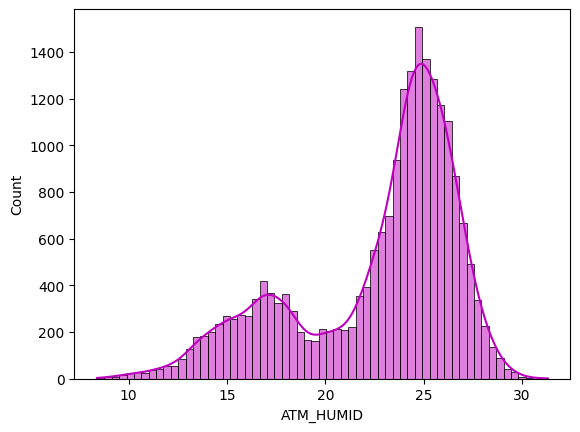

In [17]:
sns.histplot(df["ATM_HUMID"], kde=True, color="m")

<AxesSubplot: xlabel='CB_FLOW', ylabel='Count'>

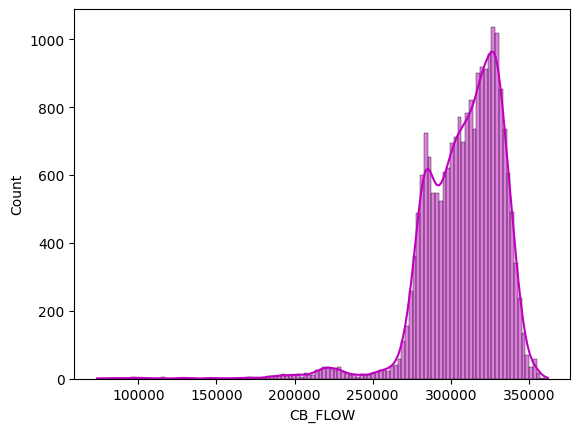

In [18]:
sns.histplot(df["CB_FLOW"], kde=True, color="m")

<AxesSubplot: xlabel='CB_PRESS', ylabel='Count'>

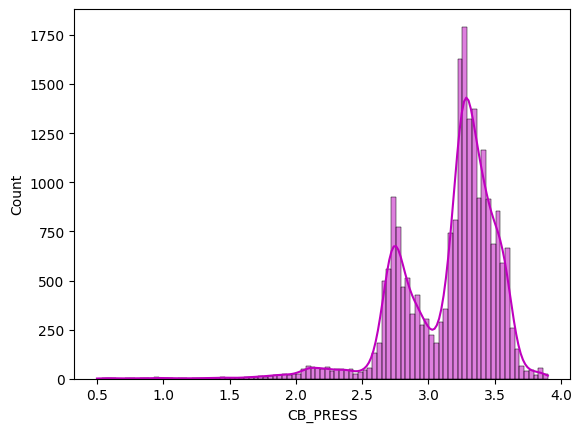

In [19]:
sns.histplot(df["CB_PRESS"], kde=True, color="m")

In [ ]:
# fig, ax = plt.subplots(figsize=(6, 4))
# ax.scatter(df["SKIN_TEMP_AVG"], df["ATM_HUMID"])
# ax.set_xlabel('ATMOSPHERIC HUMIDITY')
# ax.set_ylabel('SKIN AVG TEMPRATURE')
# plt.show()

In [22]:
data = {}
for i in df.columns:
    data[i] = df[i]
df1 = pd.DataFrame(data)

In [23]:
df1['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

C:\Users\sujan\AppData\Local\Temp\ipykernel_18448\439492093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


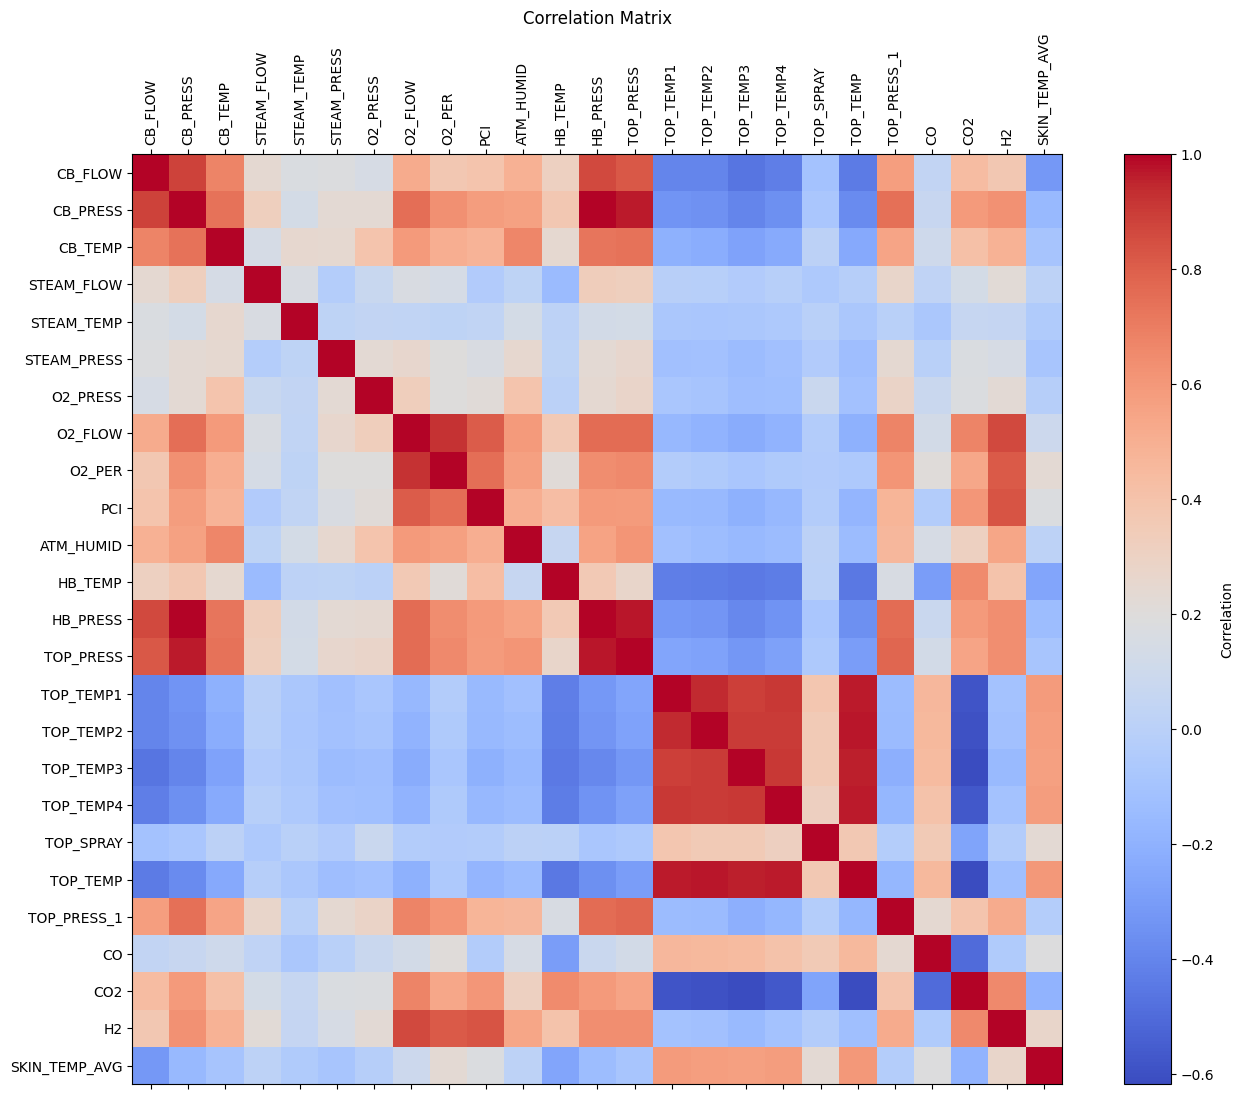

In [24]:
corr = df.corr()

# Plot correlation matrix
plt.figure(figsize=(16, 12))
plt.matshow(corr, cmap='coolwarm', fignum=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')
plt.show()